**This is the data set about Value of Energy Cost Saving Program for businesses in New York City**

# Day 4

In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [38]:
data = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [39]:
#data.head()

In [40]:
#data.describe()

How many different companies are represented in the data set?

In [41]:
data["Company Name"].unique().shape[0]

439

In [42]:
data["Company Name"].str.upper().unique().shape[0]

439

What is the total number of jobs created for businesses in Queens?

In [43]:
data["Job created"].groupby(data["Borough"]).sum()

Borough
Bronx             22.0
Brooklyn          25.0
New York           0.0
Queens           102.0
Staten Island      0.0
Name: Job created, dtype: float64

Ans: Total number of jobs created in Queens: 102

How many different unique email domains names are there in the data set?

In [44]:
import re

def find_email(text):
    email_regex = r'[\w\.-]+@([\w\.-]+)\.com'
    email = re.findall(email_regex, str(text))
    return ",".join(email)

data['emailDomain'] = data['company email'].apply(lambda x: find_email(x))

In [45]:
data['emailDomain'].unique().shape[0]

322

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [46]:
filtered_NTA=[]
for idx, name in enumerate(data['NTA'].value_counts().index.tolist()):
    if (data['NTA'].value_counts()[idx]>=5):
        filtered_NTA.append(name)

In [47]:
i=0
filtered_ind=[]
for n in filtered_NTA:
    #print(n)
    ind = 0
    for i in data['NTA']:
        if (i==n):
            filtered_ind.append(ind)
        ind+=1

In [48]:
filtered_data = data.iloc[filtered_ind]

In [49]:
filtered_data.shape

(306, 27)

In [50]:
averageJobseachNTA = filtered_data["Job created"].groupby(filtered_data["NTA"]).mean().reset_index()

In [51]:
averageSavings = filtered_data["Total Savings"].groupby(filtered_data["NTA"]).mean().reset_index()

In [52]:
avg_jobs_and_salaries = averageJobseachNTA.merge(averageSavings, how='inner', on = 'NTA')

Save your result for the previous question as a CSV file.

In [53]:
avg_jobs_and_salaries.to_csv("avg_jobs_and_salaries.csv")

# Day 5

scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings. 

Text(0, 0.5, 'Avg total savings(log)')

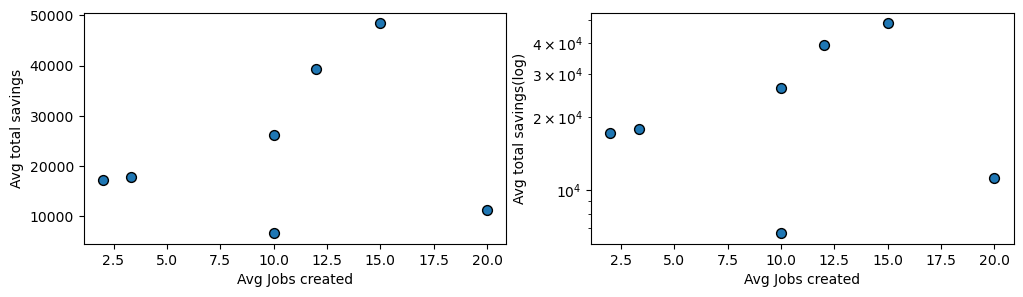

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))

ax1.scatter(averageJobseachNTA['Job created'], averageSavings['Total Savings'], s=50, facecolor = 'C0', edgecolor = 'k')
ax2.scatter(averageJobseachNTA['Job created'], averageSavings['Total Savings'], s=50, facecolor = 'C0', edgecolor = 'k')

ax2.set_yscale('log')
ax1.set_xlabel('Avg Jobs created')
ax1.set_ylabel('Avg total savings')
ax2.set_xlabel('Avg Jobs created')
ax2.set_ylabel('Avg total savings(log)')

In [70]:
#sns.scatterplot('Job created', 'Total Savings', data=avg_jobs_and_salaries)

Histogram of the log of the average total savings.

<AxesSubplot:xlabel='Total Savings', ylabel='Count'>

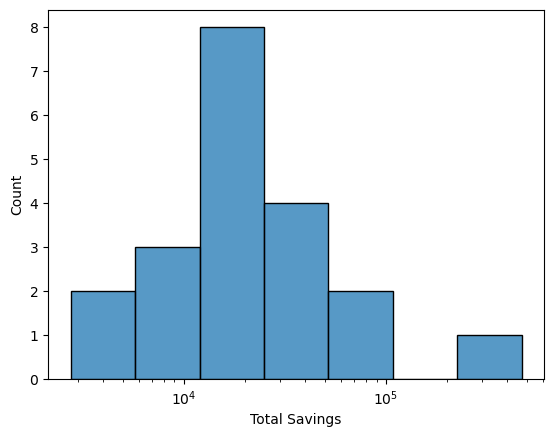

In [73]:
sns.histplot(x= 'Total Savings',  data=avg_jobs_and_salaries, log_scale=True)

line plot of the total jobs created for each month

In [78]:
data['Effective Date'] = pd.to_datetime(data['Effective Date'])

In [85]:
df = data["Job created"].groupby(data['Effective Date'].dt.to_period('M')).sum().reset_index()

<AxesSubplot:xlabel='Month', ylabel='Number of Jobs created'>

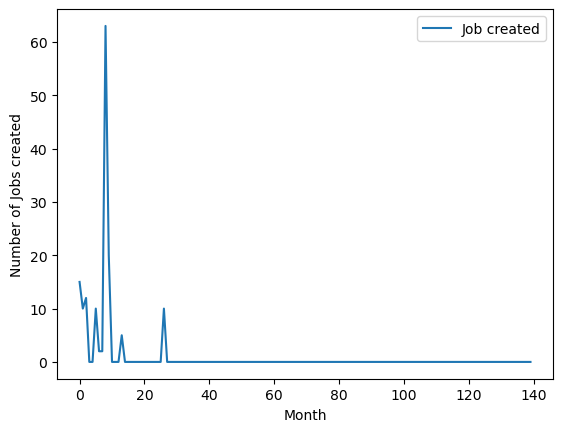

In [92]:
df.plot(ylabel = "Number of Jobs created", xlabel = 'Month', kind = 'line' )